In [32]:
import pandas as pd
import heapq

# Load the datasets
doctors_df = pd.read_csv('doctorsfinal.csv')
drug_df = pd.read_csv('drugs.csv')

def recommend_drug(disease):
    # Filter the drug data for the given disease
    drug_data = drug_df[drug_df['Disease'] == disease]
    if drug_data.empty:
        return "No drugs found for this disease."

    # Recommend the first drug for the disease
    return drug_data.iloc[0]['Drug']

def recommend_doctor(disease, criteria):
    # Filter the doctors data for the given disease
    doctor_data = doctors_df[doctors_df['Disease'] == disease]

    if criteria == 'user rating':
        # Use a priority queue to get the doctor with the highest user rating
        pq = [(-rating, doctor, free_time) for rating, doctor, free_time in zip(doctor_data['User Rating'], doctor_data['Doctor'], doctor_data['Free Time'])]
        heapq.heapify(pq)
        return heapq.heappop(pq)[1:]

    elif criteria == 'distance':
        # Create a graph representing distances between user's home and doctors
        graph = {}
        user_home = "User's Home"
        graph[user_home] = {}

        for _, row in doctor_data.iterrows():
            doctor_name = row['Doctor']
            distance = row['Distance from Home']
            free_time = row['Free Time']
            graph[user_home][doctor_name] = (distance, free_time)
            if doctor_name not in graph:
                graph[doctor_name] = {}
            graph[doctor_name][user_home] = (distance, free_time)

        # Dijkstra's algorithm to find the nearest doctor
        def dijkstra(graph, start):
            distances = {node: float('inf') for node in graph}
            distances[start] = 0
            pq = [(0, start)]

            while pq:
                current_distance, current_node = heapq.heappop(pq)

                if current_distance > distances[current_node]:
                    continue

                for neighbor, (distance, free_time) in graph[current_node].items():
                    total_distance = current_distance + distance
                    if total_distance < distances[neighbor]:
                        distances[neighbor] = total_distance
                        heapq.heappush(pq, (total_distance, neighbor))

            return distances

        # Find the nearest doctor using Dijkstra's algorithm
        nearest_doctor_distances = dijkstra(graph, user_home)
        nearest_doctor = min(nearest_doctor_distances.items(), key=lambda x: x[1])
        if nearest_doctor[0] == user_home:  # Exclude "User's Home"
            nearest_doctor = min(nearest_doctor_distances.items(), key=lambda x: x[1], default=("No doctor found", float('inf')))
        return nearest_doctor[0], graph[nearest_doctor[0]][user_home][1]

    elif criteria == 'severity':
        # Sort the doctors based on severity
        doctor_data = doctor_data.sort_values(by='Severity', ascending=False)
        return doctor_data.iloc[0]['Doctor'], doctor_data.iloc[0]['Free Time']

    else:
        return "Invalid criteria"

while True:
    disease = input("Disease Identified (or 'quit' to exit): ")
    if disease.lower() == 'quit':
        break

    criteria = input("Enter your criteria (user rating, distance, severity): ")
    recommended_doctor, free_time = recommend_doctor(disease, criteria)
    recommended_drug = recommend_drug(disease)
    
    print("Recommended Doctor:", recommended_doctor)
    print("Free Time:", free_time)
    print("Recommended Drug:", recommended_drug)


Disease Identified (or 'quit' to exit):  Allergy
Enter your criteria (user rating, distance, severity):  user rating


Recommended Doctor: Dr. Anderson
Free Time: 2024-04-27 17:00:00
Recommended Drug: Cetirizine


Disease Identified (or 'quit' to exit):  quit


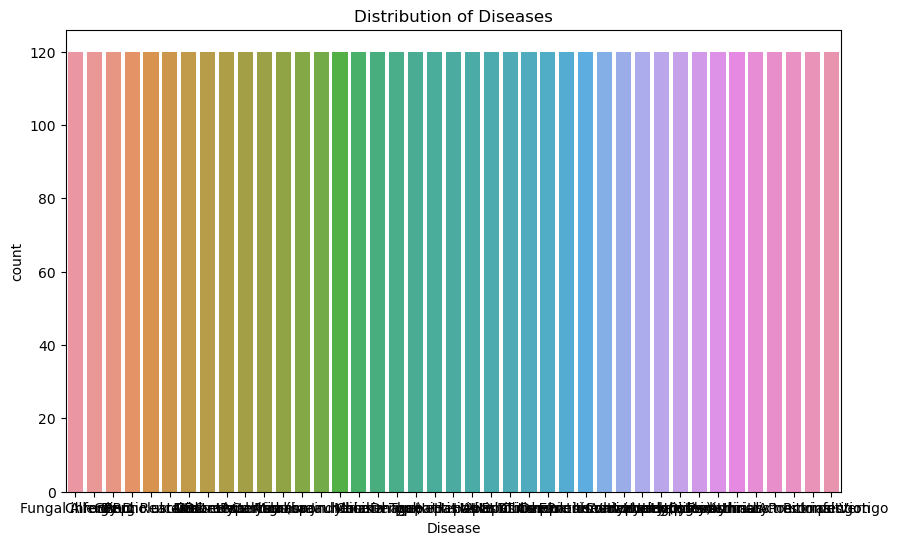

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of diseases
plt.figure(figsize=(10,6))
sns.countplot(data=disease_df, x='Disease')
plt.title('Distribution of Diseases')
plt.show()

In [30]:
from IPython.display import display

# Display the top 5 rows of the dataframe
display(drugs_df.head())


,Disease,Drug,Age_Group,Severity,Sex
0,Fungal infection,Fluconazole,Adult,Moderate,Both
1,Fungal infection,Clotrimazole,Adult,Mild,Both
2,Fungal infection,Terbinafine,Adult,Severe,Both
3,Allergy,Cetirizine,Adult,Mild,Both
4,Allergy,Loratadine,Adult,Moderate,Both
